In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import requests
from io import StringIO
warnings.simplefilter(action="ignore")

In [7]:
data_cargo = pd.read_csv("https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/refs/heads/main/cargo_fraud_only.csv", index_col=0)
data_cargo.head()

,ORI,AGENCY_NAME,INCIDENT_NUMBER,INCIDENT_DATE,DATA_SOURCE,REPORT_DATE_INDICATOR,INCIDENT_HOUR,CLEARED_EXCEPTIONALLY_INDICATOR,UCR_OFFENSE_CODE_1,LOCATION_CODE_1,...,UCR_OFFENSE_CODE_8,LOCATION_CODE_8,UCR_OFFENSE_CODE_9,LOCATION_CODE_9,UCR_OFFENSE_CODE_10,LOCATION_CODE_10,WEAPON_TYPE_1,WEAPON_AUTOMATIC_INDICATOR_1,VICTIM_TYPE_1,STOLEN_PROPERTY_DESCRIPTION_1
CARGO_THEFT_RECORD_TYPE,,,,,,,,,,,,,,,,,,,,,
IR,AK0010300,JUNEAU,Z82XWIOKL6ZS,20221209,N,NaN,11.0,NaN,23F,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IR,AK0010900,SITKA,CT0BRFBM728N,20220927,N,NaN,0.0,NaN,23H,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IR,AK0010900,SITKA,CT0BRFZC728N,20220913,N,NaN,0.0,NaN,23H,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IR,AK0010900,SITKA,CT0BROQL728N,20220427,N,NaN,20.0,NaN,23F,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IR,AK0010900,SITKA,CT0BRY3-728N,20220810,N,NaN,0.0,NaN,23F,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_cargo_fraud = data_cargo[data_cargo["offense_name"].isin(["Credit Card/Automated Teller Machine Fraud", 
                                              "Wire Fraud", 
                                              "Welfare Fraud"])]
data_cargo_fraud.head()


,data_year,ori,pub_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,county_name,region_name,...,location_name,weapon_code,weapon_name,prop_desc_code,prop_desc_code.1,prop_desc_name,stolen_value,recovered_value,recovered_flag,date_recovered
349,2012,SC0200000,Fairfield,NaN,County,SC,South Carolina,South Atlantic,FAIRFIELD,South,...,Convenience Store,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN
352,2012,SC0200000,Fairfield,NaN,County,SC,South Carolina,South Atlantic,FAIRFIELD,South,...,Residence/Home,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN
354,2012,SC0220200,Georgetown,NaN,City,SC,South Carolina,South Atlantic,GEORGETOWN,South,...,Shopping Mall,NaN,NaN,71.0,71.0,"Metals, Non-Precious",500.0,0,False,NaN
433,2012,TN0320100,Morristown,NaN,City,TN,Tennessee,East South Central,"HAMBLEN, JEFFERSON",South,...,Department/Discount Store,NaN,NaN,19.0,19.0,Merchandise,1066.0,0,False,NaN
512,2014,MI8121800,Ann Arbor,NaN,City,MI,Michigan,East North Central,WASHTENAW,Midwest,...,Service/Gas Station,NaN,NaN,9.0,9.0,Credit/ Debit cards,0.0,0,False,NaN


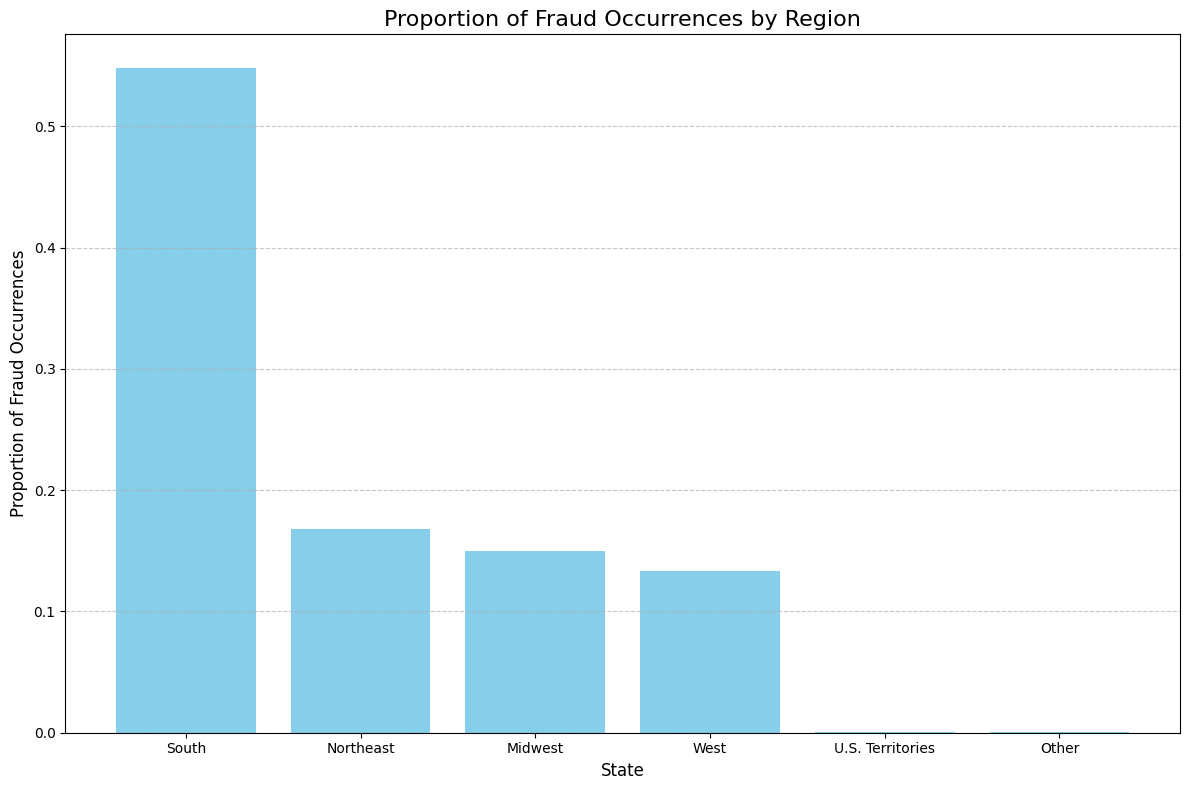

In [5]:
# calculate the proportion of fraud by region
fraud_by_state = data_cargo_fraud['region_name'].value_counts(normalize=True).sort_values(ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(fraud_by_state.index, fraud_by_state.values, color='skyblue')
plt.title('Proportion of Fraud Occurrences by Region', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Proportion of Fraud Occurrences', fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


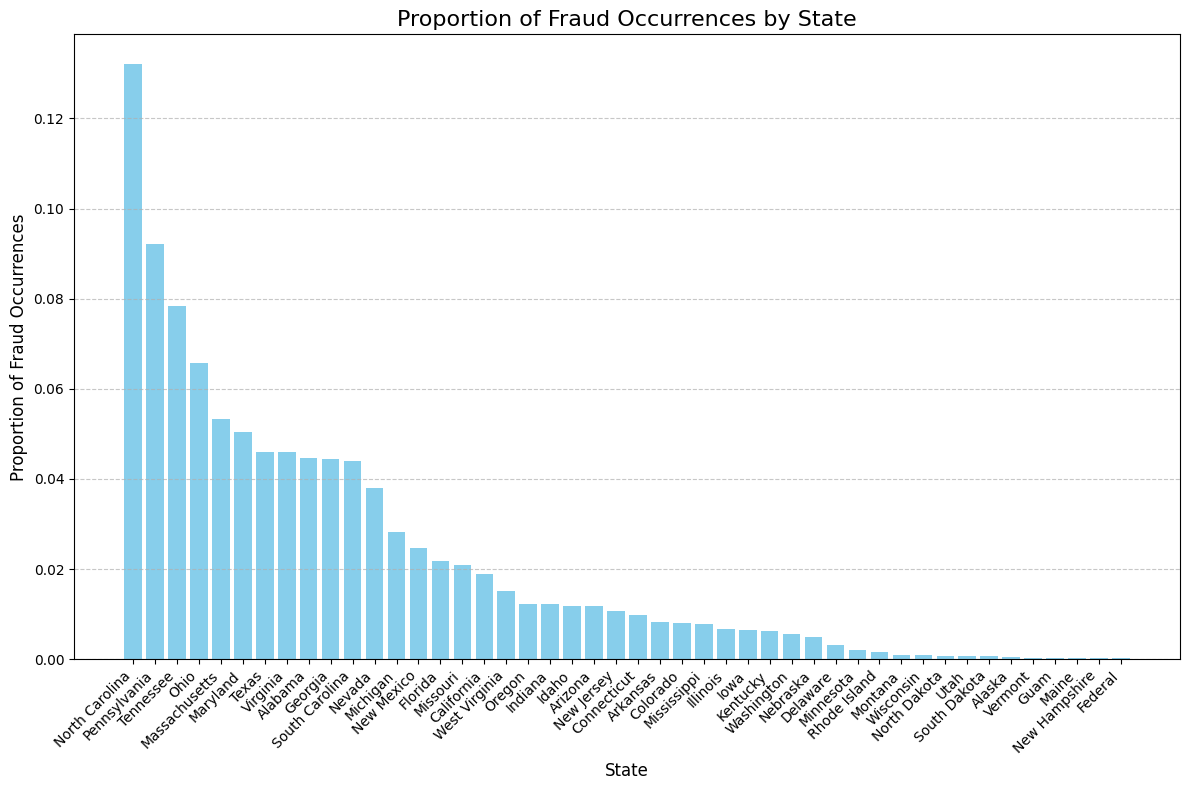

In [6]:
# calculate the proportion of fraud by state
fraud_by_state = data_cargo_fraud['state_name'].value_counts(normalize=True).sort_values(ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(fraud_by_state.index, fraud_by_state.values, color='skyblue')
plt.title('Proportion of Fraud Occurrences by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Proportion of Fraud Occurrences', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

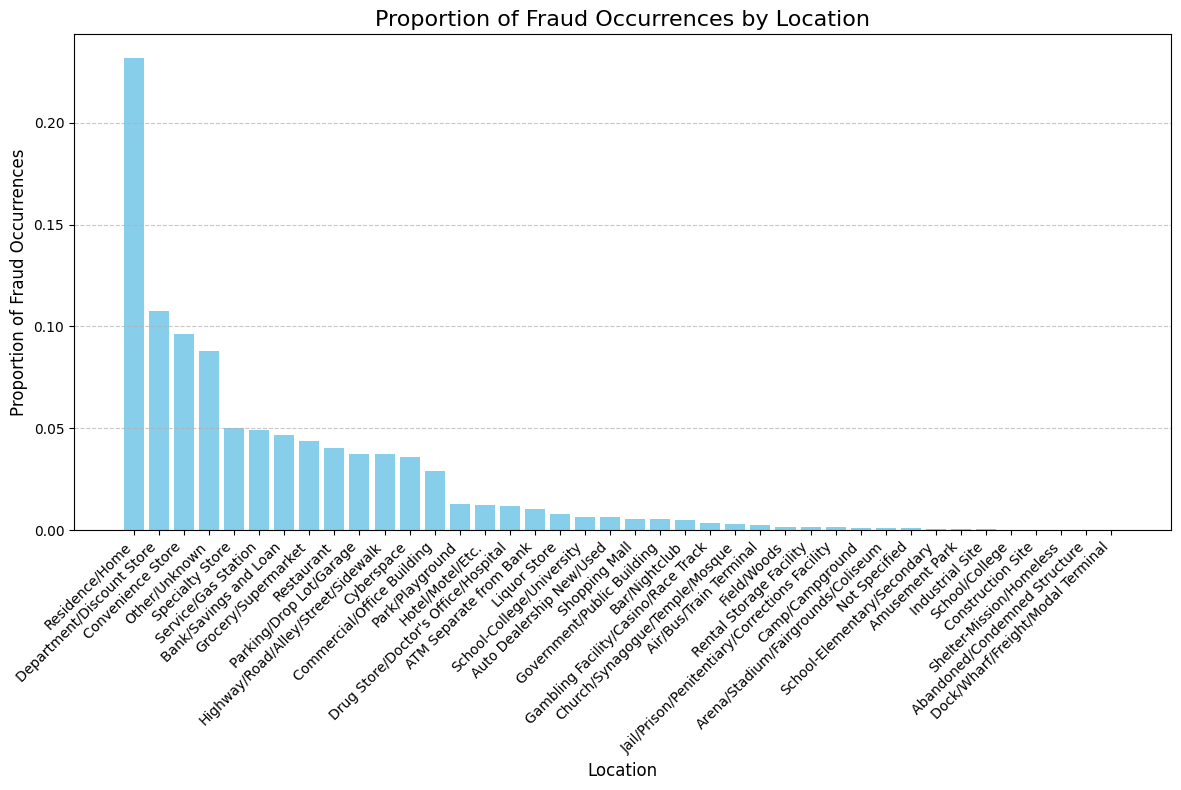

In [7]:
# calculate the proportion of fraud by state
fraud_by_state = data_cargo_fraud['location_name'].value_counts(normalize=True).sort_values(ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(fraud_by_state.index, fraud_by_state.values, color='skyblue')
plt.title('Proportion of Fraud Occurrences by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Proportion of Fraud Occurrences', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

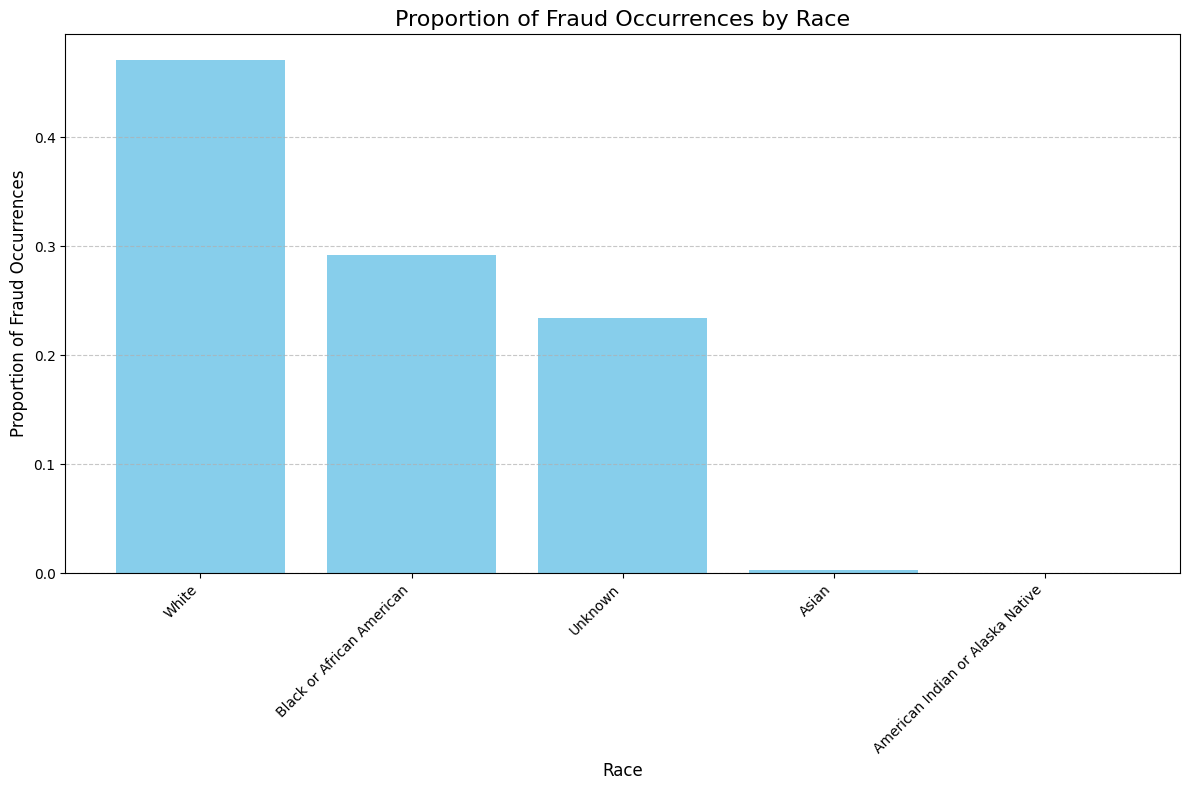

In [9]:
# calculate the proportion of fraud by state
fraud_by_state = data_cargo_fraud['offender_race'].value_counts(normalize=True).sort_values(ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(fraud_by_state.index, fraud_by_state.values, color='skyblue')
plt.title('Proportion of Fraud Occurrences by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Proportion of Fraud Occurrences', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

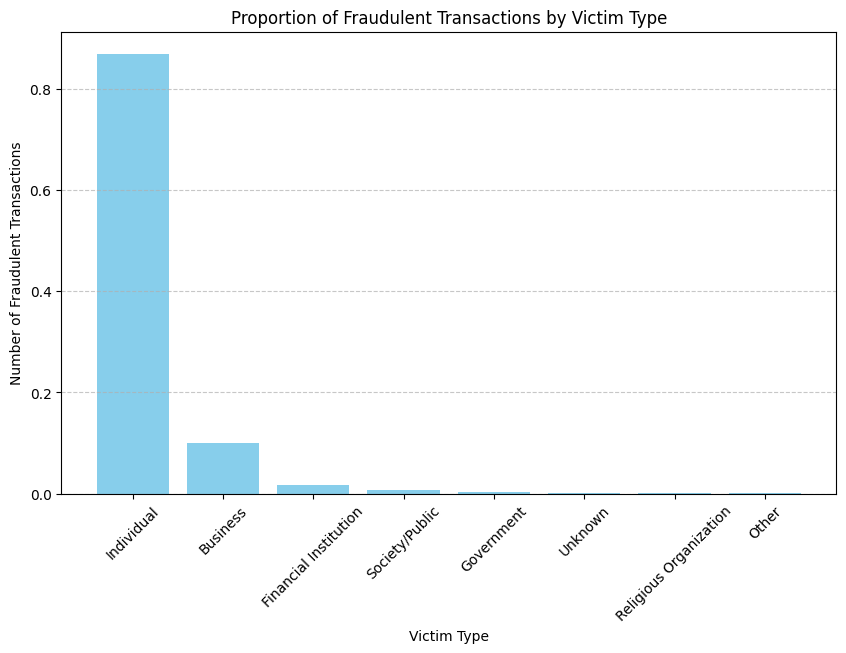

In [10]:
# count the occurrences of fraud by victim type
fraud_by_type = data_cargo_fraud['victim_type_name'].value_counts(normalize=True).sort_values(ascending=False)

# plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(fraud_by_type.index, fraud_by_type.values, color='skyblue')
plt.xlabel('Victim Type')
plt.xticks(rotation=45)
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Proportion of Fraudulent Transactions by Victim Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

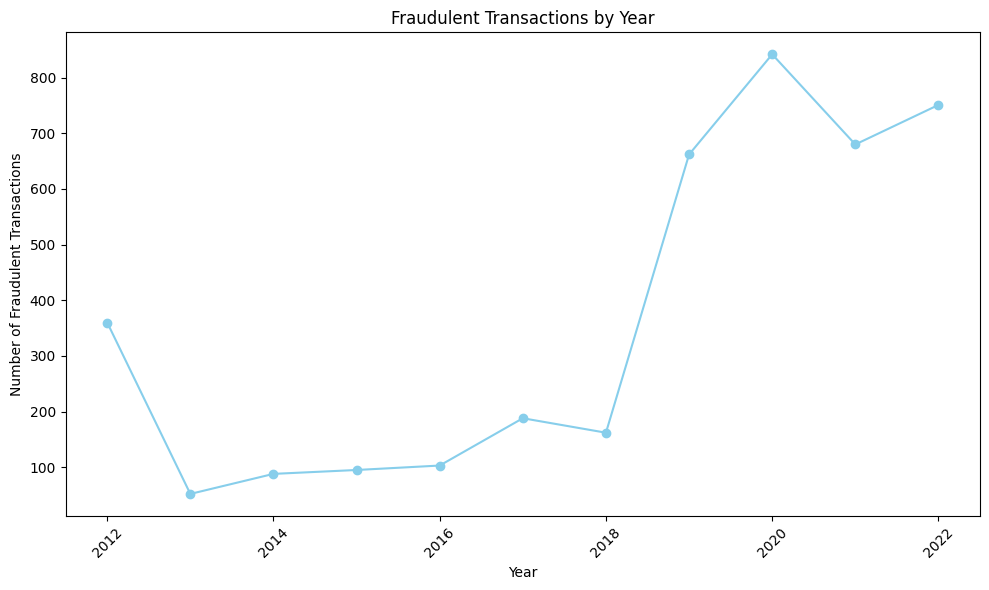

In [11]:
# count the occurrences of fraud by year
fraud_by_year = data_cargo_fraud['data_year'].value_counts().sort_index()

# plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(fraud_by_year.index, fraud_by_year.values, color='skyblue', marker='o')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Year')
plt.tight_layout() 
plt.show()
plt.show()

In [12]:
data_arrest = pd.read_csv("/Users/admin/Documents/Y3S1/CMPS 6790/Project/fraud1_data.csv")
data_arrest.head()

,Identifier,State Code,ORI Code,Group,Division,Year,MSA,Offense Code,Male Under 10,Male 10-12,...,Juvenile White,Juvenile Black,Juvenile Indian,Juvenile Asian,Juvenile Hispanic,Adult White,Adult Black,Adult Indian,Adult Asian,Adult Hispanic
0,3,50,AK00101,1C,9.0,22,38,110,0,0.0,...,2.0,4.0,1.0,0.0,0.0,33.0,16.0,14.0,6.0,0.0
1,3,50,AK00102,4,9.0,22,58,110,0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,4.0,0.0,0.0
2,3,50,AK00103,4,9.0,22,0,110,0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0
3,3,50,AK00104,6,9.0,22,0,110,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,50,AK00108,6,9.0,22,0,110,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
# converting State Code column to str type
data_arrest['State Code'] = data_arrest['State Code'].astype(str).str.strip()

# dictionary of state codes to state
state_codes = {
    '50': 'Alaska',
    '01': 'Alabama',
    '03': 'Arkansas',
    '54': 'American Samoa',
    '02': 'Arizona',
    '04': 'California',
    '05': 'Colorado',
    '06': 'Connecticut',
    '52': 'Canal Zone',
    '08': 'District of Columbia',
    '07': 'Delaware',
    '09': 'Florida',
    '10': 'Georgia',
    '55': 'Guam',
    '51': 'Hawaii',
    '14': 'Iowa',
    '11': 'Idaho',
    '12': 'Illinois',
    '13': 'Indiana',
    '15': 'Kansas',
    '16': 'Kentucky',
    '17': 'Louisiana',
    '20': 'Massachusetts',
    '19': 'Maryland',
    '18': 'Maine',
    '21': 'Michigan',
    '22': 'Minnesota',
    '24': 'Missouri',
    '23': 'Mississippi',
    '25': 'Montana',
    '26': 'Nebraska',
    '32': 'North Carolina',
    '33': 'North Dakota',
    '28': 'New Hampshire',
    '29': 'New Jersey',
    '30': 'New Mexico',
    '27': 'Nevada',
    '31': 'New York',
    '34': 'Ohio',
    '35': 'Oklahoma',
    '36': 'Oregon',
    '37': 'Pennsylvania',
    '53': 'Puerto Rico',
    '38': 'Rhode Island',
    '39': 'South Carolina',
    '40': 'South Dakota',
    '41': 'Tennessee',
    '42': 'Texas',
    '43': 'Utah',
    '62': 'Virgin Islands',
    '45': 'Virginia',
    '44': 'Vermont',
    '46': 'Washington',
    '48': 'Wisconsin',
    '47': 'West Virginia',
    '49': 'Wyoming'
}

# map the state codes to state names
data_arrest['State'] = data_arrest['State Code'].map(state_codes)
data_arrest.head()

,Identifier,State Code,ORI Code,Group,Division,Year,MSA,Offense Code,Male Under 10,Male 10-12,...,Juvenile Black,Juvenile Indian,Juvenile Asian,Juvenile Hispanic,Adult White,Adult Black,Adult Indian,Adult Asian,Adult Hispanic,State
0,3,50,AK00101,1C,9.0,22,38,110,0,0.0,...,4.0,1.0,0.0,0.0,33.0,16.0,14.0,6.0,0.0,Alaska
1,3,50,AK00102,4,9.0,22,58,110,0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,4.0,0.0,0.0,Alaska
2,3,50,AK00103,4,9.0,22,0,110,0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,Alaska
3,3,50,AK00104,6,9.0,22,0,110,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Alaska
4,3,50,AK00108,6,9.0,22,0,110,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Alaska


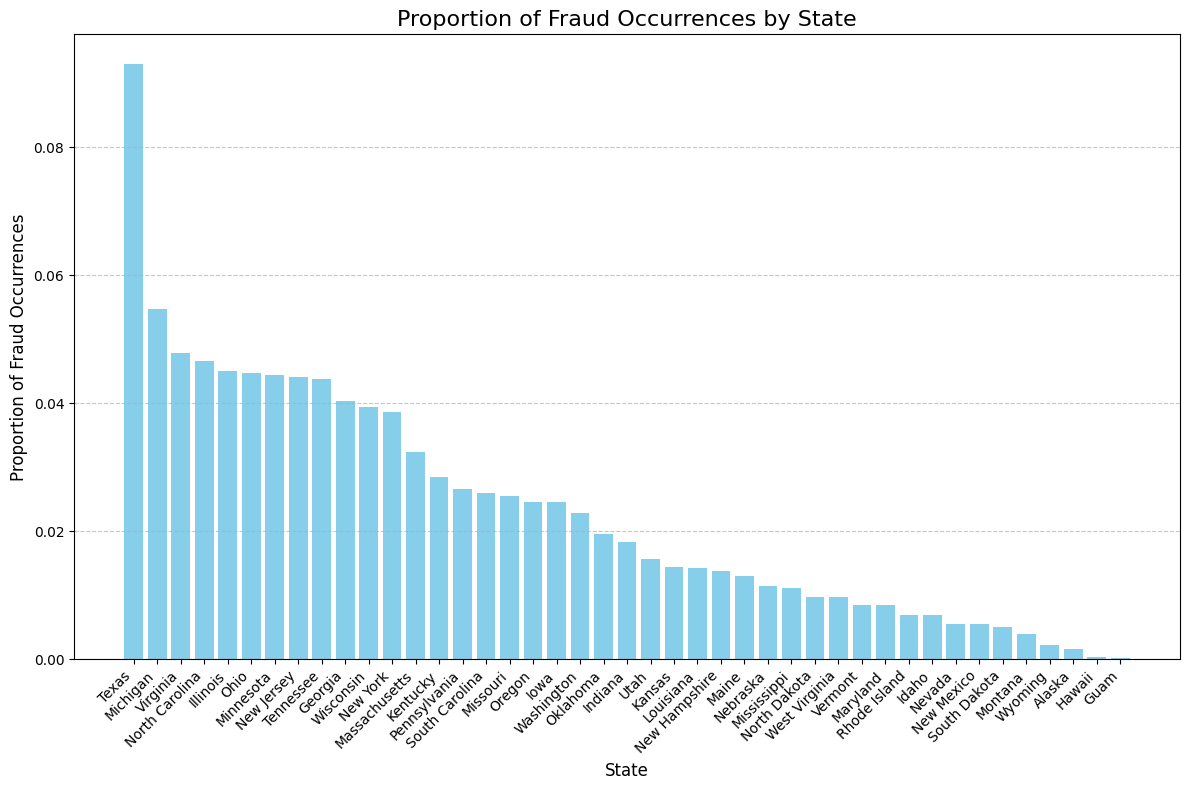

In [14]:
# calculate the proportion of fraud by state
fraud_by_state = data_arrest['State'].value_counts(normalize=True).sort_values(ascending=False)

# plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(fraud_by_state.index, fraud_by_state.values, color='skyblue')
plt.title('Proportion of Fraud Occurrences by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Proportion of Fraud Occurrences', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

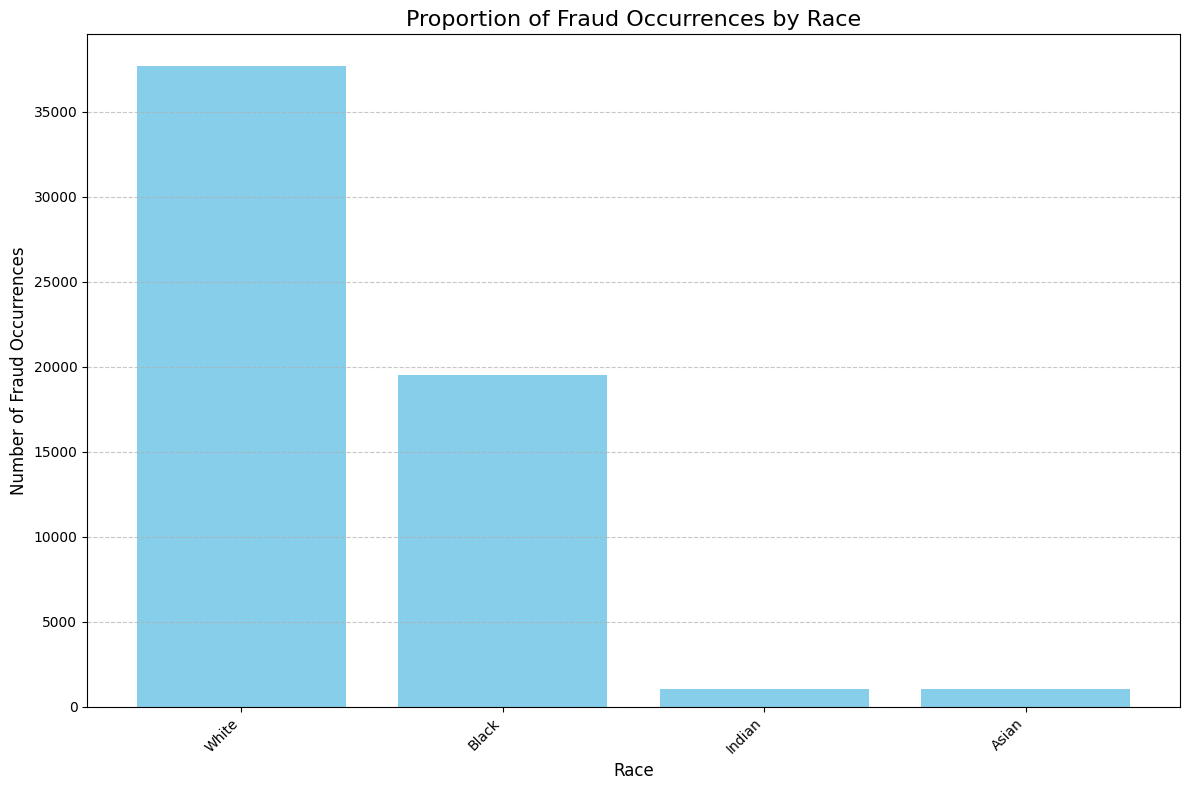

In [15]:
# calculate the occurrences of fraud by race
fraud_adult_white = data_arrest['Adult White'].sum()
fraud_adult_black = data_arrest['Adult Black'].sum()
fraud_adult_indian = data_arrest['Adult Indian'].sum()
fraud_adult_asian = data_arrest['Adult Asian'].sum()

# combine the counts into a single Series
fraud_by_race = pd.Series({
    'White': fraud_adult_white,
    'Black': fraud_adult_black,
    'Indian': fraud_adult_indian,
    'Asian': fraud_adult_asian
})

# plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(fraud_by_race.index, fraud_by_race.values, color='skyblue')
plt.title('Proportion of Fraud Occurrences by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Number of Fraud Occurrences', fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()